## Importing Libraries

In [63]:
pip install torch==2.2.0 torchvision torchaudio torchtext==0.17.0 --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [64]:
pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [65]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [66]:
pip install spacy==3.5.0

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [67]:
pip install datasets

DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [68]:
pip install huggingface_hub datasets pandas


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [1]:
pip install wordcutpy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import torch, torchdata, torchtext
from torch import nn
import torch.nn.functional as F

import random, math, time
import datasets
import matplotlib.pyplot as plt
import torch.optim as optim

# Set device as GPU if available, else set to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
print(device)

#make our work comparable if restarted the kernel
SEED = 1234
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

c:\Users\st124\OneDrive\Desktop\NLP_A3\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [3]:
torch.__version__

'2.2.0+cu118'

In [4]:
torchtext.__version__

'0.17.0+cpu'

# 1. ETL: Loading dataset

In [3]:
import datasets,torchtext

SRC_LANGUAGE = 'en' # English
TRG_LANGUAGE = 'my' # Myanmar

dataset = datasets.load_dataset('myothiha/mm_eng_alt_corpus')

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'en', 'my'],
        num_rows: 16280
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'en', 'my'],
        num_rows: 1809
    })
    test: Dataset({
        features: ['Unnamed: 0', 'en', 'my'],
        num_rows: 2010
    })
})

In [5]:
train = [(row['en'], row['my']) for row in dataset['train']]

In [6]:
print(dataset.keys())  # Should return: dict_keys(['train', 'validation', 'test'])

dict_keys(['train', 'validation', 'test'])


In [7]:
train_data = dataset["train"]  # Access the training set
print(train_data)

#also check for the test and validation data
test_data = dataset["test"]  # Access the test set
print(test_data)

validation_data = dataset["validation"]  # Access the validation set
print(validation_data)

Dataset({
    features: ['Unnamed: 0', 'en', 'my'],
    num_rows: 16280
})
Dataset({
    features: ['Unnamed: 0', 'en', 'my'],
    num_rows: 2010
})
Dataset({
    features: ['Unnamed: 0', 'en', 'my'],
    num_rows: 1809
})


In [8]:
#drop the columns that are not needed
train_data = train_data.remove_columns(["Unnamed: 0"]) 
test_data = test_data.remove_columns(["Unnamed: 0"])
validation_data = validation_data.remove_columns(["Unnamed: 0"])

In [9]:
# Convert each dataset split into a list of (English, Myanmar) sentence pairs
train_data = [(row["en"], row["my"]) for row in dataset["train"]]
test_data = [(row["en"], row["my"]) for row in dataset["test"]]
validation_data = [(row["en"], row["my"]) for row in dataset["validation"]]

In [10]:
train_data[1]

('Prime Minister Stephen Harper urged Canadians to pay tribute to the soldiers and aid workers in Afghanistan.',
 'ဝန်ကြီးချုပ် စတီဖန် ဟာပါ သည် အာဖကန်နစ္စတန် ရှိ စစ်သား များ နှင့် ပရဟိတ ဆောင်ရွက်ပေးနေသူ များ ကို ချီးကျူး ဂုဏ်ပြုခြင်း ပြုလုပ် ပေး ရန် ကနေဒါ လူမျိုး များ ကို တိုက်တွန်း ခဲ့ ပါ သည် ။')

# 2. EDA-Data Preparation

## Tokenization, Data Processing

In [11]:
pip install sentencepiece

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [25]:
pip install wordcutpy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [12]:
import wordcut
import sentencepiece as spm
import torch
from torch.utils.data import DataLoader, Dataset

In [13]:
sample = train_data[1]
sample

('Prime Minister Stephen Harper urged Canadians to pay tribute to the soldiers and aid workers in Afghanistan.',
 'ဝန်ကြီးချုပ် စတီဖန် ဟာပါ သည် အာဖကန်နစ္စတန် ရှိ စစ်သား များ နှင့် ပရဟိတ ဆောင်ရွက်ပေးနေသူ များ ကို ချီးကျူး ဂုဏ်ပြုခြင်း ပြုလုပ် ပေး ရန် ကနေဒါ လူမျိုး များ ကို တိုက်တွန်း ခဲ့ ပါ သည် ။')

In [14]:
train_size = len(train_data)
print(train_size)

val_size = len(validation_data)
print(val_size)

test_size = len(test_data)
print(test_size)

16280
1809
2010


In [2]:
pip install transformers

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ------------------ --------------------- 4.5/9.7 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 33.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 68.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\st124\onedrive\desktop\nlp_a3\.venv\lib\site-packages\pyidaungsu-0.1.4-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [17]:
from transformers import MBartTokenizer

In [18]:
# Load MBart tokenizer (supports Myanmar translation)
tokenizer = MBartTokenizer.from_pretrained("facebook/mbart-large-50")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'MBart50Tokenizer'. 
The class this function is called from is 'MBartTokenizer'.


In [19]:
print(tokenizer)


MBartTokenizer(name_or_path='facebook/mbart-large-50', vocab_size=250027, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>', 'additional_special_tokens': ['ar_AR', 'cs_CZ', 'de_DE', 'en_XX', 'es_XX', 'et_EE', 'fi_FI', 'fr_XX', 'gu_IN', 'hi_IN', 'it_IT', 'ja_XX', 'kk_KZ', 'ko_KR', 'lt_LT', 'lv_LV', 'my_MM', 'ne_NP', 'nl_XX', 'ro_RO', 'ru_RU', 'si_LK', 'tr_TR', 'vi_VN', 'zh_CN', 'af_ZA', 'az_AZ', 'bn_IN', 'fa_IR', 'he_IL', 'hr_HR', 'id_ID', 'ka_GE', 'km_KH', 'mk_MK', 'ml_IN', 'mn_MN', 'mr_IN', 'pl_PL', 'ps_AF', 'pt_XX', 'sv_SE', 'sw_KE', 'ta_IN', 'te_IN', 'th_TH', 'tl_XX', 'uk_UA', 'ur_PK', 'xh_ZA', 'gl_ES', 'sl_SI']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken

In [20]:
# Place-holders
token_transform = {}
vocab_transform = {}

In [21]:
# Assign tokenizers to the dictionary
token_transform["en"] = lambda text: tokenizer.tokenize(text)
token_transform["my"] = lambda text: tokenizer.tokenize(text)

In [22]:
# Example: Tokenizing a sentence
sample_text_en = "Hello, how are you?"
sample_text_my = "မင်္ဂလာပါ။"

In [23]:
print("English Tokenized:", token_transform["en"](sample_text_en))
print("Myanmar Tokenized:", token_transform["my"](sample_text_my))

English Tokenized: ['▁Hello', ',', '▁how', '▁are', '▁you', '?']
Myanmar Tokenized: ['▁မ', 'င်္', 'ဂ', 'လာ', 'ပါ။']


In [24]:
# Helper function to yield list of tokens for vocab building
def yield_tokens(data, language):
    language_index = {"en": 0, "my": 1}  # Index for English (0) and Myanmar (1)
    for example in data:
        yield token_transform[language](example[language_index[language]])  # Tokenize each sentence


In [25]:
# Define special symbols and their indices
UNK_IDX, PAD_IDX, SOS_IDX, EOS_IDX = 0, 1, 2, 3

# List of special symbols
special_symbols = ["<unk>", "<pad>", "<sos>", "<eos>"]

In [26]:
from torchtext.vocab import build_vocab_from_iterator


dataset_splits = {
    "train": train_data,
    "validation": validation_data,
    "test": test_data
}

# Build vocabulary for both English and Myanmar
for lang in ["en", "my"]:
    vocab_transform[lang] = build_vocab_from_iterator(
        yield_tokens(dataset_splits["train"], lang),  # Tokenize & iterate over training data
        min_freq=1,  # Keep all words, even those appearing once because Myanmar words are too small in number
        specials=special_symbols,  # Include special symbols
        special_first=True  # Place special symbols at the beginning
    )

# Set the unknown token index for both vocabularies
for lang in ["en", "my"]:
    vocab_transform[lang].set_default_index(UNK_IDX)


In [27]:
# Test some example words in English
test_words_en = ["hello", "world", "this", "is", "unknownword"]
token_ids_en = vocab_transform["en"](test_words_en)

In [28]:
# Test some example words in Myanmar
test_words_my = ["မင်္ဂလာပါ", "လောလောဆယ်", "ဟုတ်", "မဟုတ်", "အမည်မသိစာသား"]
token_ids_my = vocab_transform["my"](test_words_my)

In [29]:
print("🔹 English Tokens -> IDs:", list(zip(test_words_en, token_ids_en)))
print("🔹 Myanmar Tokens -> IDs:", list(zip(test_words_my, token_ids_my)))

🔹 English Tokens -> IDs: [('hello', 0), ('world', 10436), ('this', 5085), ('is', 425), ('unknownword', 0)]
🔹 Myanmar Tokens -> IDs: [('မင်္ဂလာပါ', 0), ('လောလောဆယ်', 0), ('ဟုတ်', 0), ('မဟုတ်', 416), ('အမည်မသိစာသား', 0)]


In [30]:
# Get the index-to-string mapping (itos = "index to string")
itos_en = vocab_transform["en"].get_itos()
itos_my = vocab_transform["my"].get_itos()

In [31]:
# Convert back from IDs to words
print("🔹 Reverse Lookup (English):", [itos_en[i] for i in token_ids_en])
print("🔹 Reverse Lookup (Myanmar):", [itos_my[i] for i in token_ids_my])

🔹 Reverse Lookup (English): ['<unk>', 'world', 'this', 'is', '<unk>']
🔹 Reverse Lookup (Myanmar): ['<unk>', '<unk>', '<unk>', 'မဟုတ်', '<unk>']


In [32]:
print("🔹 English Vocabulary Size:", len(vocab_transform["en"]))
print("🔹 Myanmar Vocabulary Size:", len(vocab_transform["my"]))

🔹 English Vocabulary Size: 18160
🔹 Myanmar Vocabulary Size: 1763


In [33]:
print("🔹 Tokenized Myanmar Sentence:", token_transform["my"]("မင်္ဂလာပါ။"))


🔹 Tokenized Myanmar Sentence: ['▁မ', 'င်္', 'ဂ', 'လာ', 'ပါ။']


In [34]:
import sentencepiece as spm

# Prepare Myanmar text for training the tokenizer
with open("myanmar_text.txt", "w", encoding="utf-8") as f:
    for en, my in train_data:  # Extract Myanmar text from train_data
        f.write(my + "\n")

# Train a SentencePiece tokenizer
spm.SentencePieceTrainer.train(input="myanmar_text.txt", model_prefix="myanmar_bpe", vocab_size=32000)

# Load the trained tokenizer
spm_tokenizer = spm.SentencePieceProcessor(model_file="myanmar_bpe.model")

# Test tokenization
print("🔹 SentencePiece Tokenized Myanmar:", spm_tokenizer.encode("မင်္ဂလာပါ။", out_type=str))


🔹 SentencePiece Tokenized Myanmar: ['▁မင်္ဂလာ', 'ပါ', '။']


In [35]:
from torchtext.vocab import build_vocab_from_iterator

def yield_tokens_sentencepiece(data):
    for _, my_text in data:
        yield spm_tokenizer.encode(my_text, out_type=str)  # Tokenize with SentencePiece

# Rebuild the Myanmar vocabulary
vocab_transform["my"] = build_vocab_from_iterator(
    yield_tokens_sentencepiece(train_data),
    min_freq=1,
    specials=special_symbols,
    special_first=True
)

# Set unknown token index
vocab_transform["my"].set_default_index(UNK_IDX)


In [36]:
test_words_my = ["မင်္ဂလာပါ", "လောလောဆယ်", "ဟုတ်", "မဟုတ်", "အမည်မသိစာသား"]
token_ids_my = vocab_transform["my"](test_words_my)

itos_my = vocab_transform["my"].get_itos()
print("🔹 Reverse Lookup (Myanmar):", [itos_my[i] for i in token_ids_my])


🔹 Reverse Lookup (Myanmar): ['<unk>', 'လောလောဆယ်', 'ဟုတ်', 'မဟုတ်', '<unk>']


## Data Preprocessing(Numericalization)

In [37]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"✅ Using device: {device}")

✅ Using device: cuda


In [38]:
def numericalize(example, language):
    return torch.tensor(vocab_transform[language](example), dtype=torch.long).to(device)


## Preparing Dataloader

In [39]:
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    src_batch, trg_batch = [], []

    for src_text, trg_text in batch:
        src_batch.append(numericalize(src_text, "en"))
        trg_batch.append(numericalize(trg_text, "my"))

    # Pad sequences so they have the same length in a batch
    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True).to(device)
    trg_batch = pad_sequence(trg_batch, padding_value=PAD_IDX, batch_first=True).to(device)

    return src_batch, trg_batch  # Return as batch tensors


In [40]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

BATCH_SIZE = 8 # Using 8 for GPU memory constraints

# Function to apply sequential transformations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# Function to add BOS (Start of Sentence) and EOS (End of Sentence) tokens
def tensor_transform(token_ids):
    return torch.cat((torch.tensor([SOS_IDX]), 
                      torch.tensor(token_ids), 
                      torch.tensor([EOS_IDX])))

# Define transformations for both English (SRC) and Myanmar (TRG)
text_transform = {}
for lang in ["en", "my"]:
    text_transform[lang] = sequential_transforms(
        token_transform[lang],  # Tokenization
        vocab_transform[lang],  # Numericalization
        tensor_transform        # Add BOS/EOS and convert to tensor
    )

# Function to collate batches for training
def collate_batch(batch):
    src_batch, src_len_batch, trg_batch = [], [], []
    
    for src_sample, trg_sample in batch:
        processed_text = text_transform["en"](src_sample.rstrip("\n"))  # Process English text
        src_batch.append(processed_text)
        trg_batch.append(text_transform["my"](trg_sample.rstrip("\n")))  # Process Myanmar text
        src_len_batch.append(processed_text.size(0))  # Store sentence length

    # Pad sequences for batch consistency
    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=True)
    trg_batch = pad_sequence(trg_batch, padding_value=PAD_IDX, batch_first=True)

    return src_batch.to(device), torch.tensor(src_len_batch, dtype=torch.int64).to(device), trg_batch.to(device)



In [41]:
# Define DataLoaders
batch_size = 8
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_loader = DataLoader(validation_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)

In [42]:
for en, _, my in train_loader:
    break

In [43]:
print("English shape: ", en.shape)  # (batch_size, seq_len)
print("Myanmar shape: ", my.shape)   # (batch_size, seq_len)

English shape:  torch.Size([8, 53])
Myanmar shape:  torch.Size([8, 108])


## 5. Design the model

## Encoder layer

In [44]:
class EncoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device, mech):
        super().__init__()
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.ff_layer_norm        = nn.LayerNorm(hid_dim)
        self.self_attention       = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device, mech)
        self.feedforward          = PositionwiseFeedforwardLayer(hid_dim, pf_dim, dropout)
        self.dropout              = nn.Dropout(dropout)
        
    def forward(self, src, src_mask):
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len]   #if the token is padding, it will be 1, otherwise 0
        _src, _ = self.self_attention(src, src, src, src_mask)
        src     = self.self_attn_layer_norm(src + self.dropout(_src))
        #src: [batch_size, src len, hid dim]
        
        _src    = self.feedforward(src)
        src     = self.ff_layer_norm(src + self.dropout(_src))
        #src: [batch_size, src len, hid dim]
        
        return src

## Encoder

In [45]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hid_dim, n_layers, n_heads, pf_dim, dropout, device, 
                 mech, max_length = 1000):
        super().__init__()
        self.device = device
        self.tok_embedding = nn.Embedding(input_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        self.layers        = nn.ModuleList([EncoderLayer(hid_dim, n_heads, pf_dim, dropout, device, mech)
                                           for _ in range(n_layers)])
        self.dropout       = nn.Dropout(dropout)
        self.scale         = torch.sqrt(torch.FloatTensor([hid_dim])).to(self.device)
        
    def forward(self, src, src_mask):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len    = src.shape[1]
        
        pos        = torch.arange(0, src_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        #pos: [batch_size, src_len]
        
        src        = self.dropout((self.tok_embedding(src) * self.scale) + self.pos_embedding(pos))
        #src: [batch_size, src_len, hid_dim]
        
        for layer in self.layers:
            src = layer(src, src_mask)
        #src: [batch_size, src_len, hid_dim]
        return src

## Multi-Head Attention 

In [46]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device, attention_type="gen"):
        super().__init__()

        assert hid_dim % n_heads == 0, "Hidden dimension must be divisible by number of heads"

        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        self.attention_type = attention_type  # Select Attention Mechanism
        self.device = device

        # Linear transformations for Q, K, V
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)

        # Layers for additive attention
        self.v = nn.Linear(self.head_dim, 1)                 
        self.W = nn.Linear(self.head_dim, self.head_dim)  # Used in multiplicative
        self.U = nn.Linear(self.head_dim, self.head_dim)

        # Final output transformation
        self.fc_o = nn.Linear(hid_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
    
    def forward(self, query, key, value, mask = None):
        #src, src, src, src_mask
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
        
        
        batch_size = query.shape[0]
        query_len = query.shape[1]
        key_len = key.shape[1]
        
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        #Q=K=V: [batch_size, src len, hid_dim] when self attention
        #Q = [batch_size, query len, hid_dim], K=V = [batch_size, key len, hid_dim]

        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        #Q = [batch_size, n heads, query len, head_dim]
        #K=V = [batch_size, n heads, key len, head_dim]

        # Select Attention Mechanism
        if self.attention_type == "gen":
            energy = self.general_attention(Q, K)  # General Attention
        elif self.attention_type == "mul":
            energy = self.multiplicative_attention(Q, K)  # Multiplicative Attention
        elif self.attention_type == "add":
            energy = self.additive_attention(Q, K)  # Additive Attention
        else:
            raise ValueError("Invalid attention type. Choose from 'gen', 'mul', 'add'.")

        # Masking for padding
        if mask is not None:
            energy = energy.masked_fill(mask == 0, float('-inf'))

        attention = torch.softmax(energy, dim=-1)

        # Compute weighted sum
        x = torch.matmul(self.dropout(attention), V)
        x = x.permute(0, 2, 1, 3).contiguous()
        x = x.view(batch_size, -1, self.hid_dim)
        x = self.fc_o(x)

        return x, attention

    def general_attention(self, Q, K):
        return torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale

    def multiplicative_attention(self, Q, K):
        return torch.matmul(Q, self.W(K).permute(0, 1, 3, 2)) / self.scale

    def additive_attention(self, Q, K):
        batch_size, n_heads, query_len, key_len, head_dim = Q.shape[0], Q.shape[1], Q.shape[2], K.shape[2], Q.shape[3]

        # Reshape Q and K to allow element-wise addition
        Q = Q.view(batch_size, n_heads, query_len, 1, head_dim)
        K = K.view(batch_size, n_heads, 1, key_len, head_dim)

        energy = self.v(torch.tanh(self.W(Q) + self.U(K))) / self.scale
        return energy.squeeze(4)  # Remove extra dimension

## Decoder Layer

In [47]:
class DecoderLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, pf_dim, dropout, device, mech):
        super().__init__()
        self.self_attn_layer_norm = nn.LayerNorm(hid_dim)
        self.enc_attn_layer_norm  = nn.LayerNorm(hid_dim)
        self.ff_layer_norm        = nn.LayerNorm(hid_dim)
        self.self_attention       = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device, mech)
        self.encoder_attention    = MultiHeadAttentionLayer(hid_dim, n_heads, dropout, device, mech)
        self.feedforward          = PositionwiseFeedforwardLayer(hid_dim, pf_dim, dropout)
        self.dropout              = nn.Dropout(dropout)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len, hid dim]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        _trg, _ = self.self_attention(trg, trg, trg, trg_mask)
        trg     = self.self_attn_layer_norm(trg + self.dropout(_trg))
        #trg = [batch_size, trg len, hid dim]
        
        _trg, attention = self.encoder_attention(trg, enc_src, enc_src, src_mask)
        trg             = self.enc_attn_layer_norm(trg + self.dropout(_trg))
        #trg = [batch_size, trg len, hid dim]
        #attention = [batch_size, n heads, trg len, src len]
        
        _trg = self.feedforward(trg)
        trg  = self.ff_layer_norm(trg + self.dropout(_trg))
        #trg = [batch_size, trg len, hid dim]
        
        return trg, attention

## Decoder

In [48]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hid_dim, n_layers, n_heads, 
                 pf_dim, dropout, device, mech, max_length = 1000):
        super().__init__()
        self.device = device
        self.mech = mech
        self.tok_embedding = nn.Embedding(output_dim, hid_dim)
        self.pos_embedding = nn.Embedding(max_length, hid_dim)
        self.layers        = nn.ModuleList([DecoderLayer(hid_dim, n_heads, pf_dim, dropout, device, mech)
                                            for _ in range(n_layers)])
        self.fc_out        = nn.Linear(hid_dim, output_dim)
        self.dropout       = nn.Dropout(dropout)
        self.scale         = torch.sqrt(torch.FloatTensor([hid_dim])).to(device)
        
    def forward(self, trg, enc_src, trg_mask, src_mask):
        
        #trg = [batch size, trg len]
        #enc_src = [batch size, src len, hid dim]
        #trg_mask = [batch size, 1, trg len, trg len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = trg.shape[0]
        trg_len    = trg.shape[1]
        
        
        pos = torch.arange(0, trg_len).unsqueeze(0).repeat(batch_size, 1).to(self.device)
        #pos: [batch_size, trg len]
        
        # print(trg.shape, self.scale, self.tok_embedding, self.pos_embedding)
        trg = self.dropout((self.tok_embedding(trg) * self.scale) + self.pos_embedding(pos))
        #trg: [batch_size, trg len, hid dim]
        
        for layer in self.layers:
            trg, attention = layer(trg, enc_src, trg_mask, src_mask)
            
        #trg: [batch_size, trg len, hid dim]
        #attention: [batch_size, n heads, trg len, src len]
        
        output = self.fc_out(trg)
        #output = [batch_size, trg len, output_dim]
        # print(attention.shape)
        return output, attention

In [49]:
import torch.nn.functional as F
class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        self.fc1 = nn.Linear(hid_dim, pf_dim)
        self.fc2 = nn.Linear(pf_dim, hid_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.fc2(self.dropout(F.relu(self.fc1(x))))


## Seq2seq Model

In [50]:
class Seq2SeqTransformer(nn.Module):
    def __init__(self, encoder, decoder, src_pad_idx, trg_pad_idx, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_pad_idx = src_pad_idx
        self.trg_pad_idx = trg_pad_idx
        self.device = device

    def make_src_mask(self, src):
        return (src != self.src_pad_idx).unsqueeze(1).unsqueeze(2)
        # Shape: [batch size, 1, 1, src len]

    def make_trg_mask(self, trg):
        trg_pad_mask = (trg != self.trg_pad_idx).unsqueeze(1).unsqueeze(2)
        trg_len = trg.size(1)

        trg_sub_mask = torch.tril(torch.ones(trg_len, trg_len, device=self.device)).bool()
        return trg_pad_mask & trg_sub_mask
        # Shape: [batch size, 1, trg len, trg len]

    def forward(self, src, trg):
        src_mask = self.make_src_mask(src)
        trg_mask = self.make_trg_mask(trg)

        enc_src = self.encoder(src, src_mask)
        output, attention = self.decoder(trg, enc_src, trg_mask, src_mask)

        return output, attention


## Training

In [51]:
import torch.nn as nn

def initialize_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d) or isinstance(m, nn.Embedding):
        if hasattr(m, 'weight') and m.weight is not None:
            nn.init.xavier_uniform_(m.weight)
        if hasattr(m, 'bias') and m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero


In [52]:
def initialize_model(attention_mech):
    # Define model hyperparameters
    INPUT_DIM = len(vocab_transform[SRC_LANGUAGE])
    OUTPUT_DIM = len(vocab_transform[TRG_LANGUAGE])
    HID_DIM = 256
    ENC_LAYERS, DEC_LAYERS = 3, 3
    ENC_HEADS, DEC_HEADS = 8, 8
    ENC_PF_DIM, DEC_PF_DIM = 512, 512
    ENC_DROPOUT, DEC_DROPOUT = 0.1, 0.1

    # Initialize encoder and decoder with specified attention mechanism
    encoder = Encoder(INPUT_DIM, HID_DIM, ENC_LAYERS, ENC_HEADS, ENC_PF_DIM, ENC_DROPOUT, device, attention_mech)
    decoder = Decoder(OUTPUT_DIM, HID_DIM, DEC_LAYERS, DEC_HEADS, DEC_PF_DIM, DEC_DROPOUT, device, attention_mech)

    # Define padding indices
    SRC_PAD_IDX = PAD_IDX
    TRG_PAD_IDX = PAD_IDX

    # Create the Seq2Seq transformer model
    model = Seq2SeqTransformer(encoder, decoder, SRC_PAD_IDX, TRG_PAD_IDX, device).to(device)

    # Apply weight initialization
    model.apply(initialize_weights)

    return model


In [53]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    total_params = sum(params)

    print(f"Total Trainable Parameters: {total_params:,}")  # Adds thousand separator for readability

    return total_params  # Returning total parameter count for potential use elsewhere


## General Attention model

In [54]:
genmodel = initialize_model('gen')
count_parameters(genmodel)


Total Trainable Parameters: 24,897,906


24897906

## Multiplicative Attention model

In [55]:
mulmodel = initialize_model('mul')
count_parameters(mulmodel)

Total Trainable Parameters: 24,897,906


24897906

## Additive Attention model

In [56]:
addmodel = initialize_model('add')
count_parameters(addmodel)

Total Trainable Parameters: 24,897,906


24897906

## Optimizer and learning rate

In [57]:
import torch.optim as optim

# Learning rate
lr = 0.001

# Ensure models are initialized before using them
genmodel = initialize_model('gen')
mulmodel = initialize_model('mul')
addmodel = initialize_model('add')

# Define optimizers
optimizer_gen = optim.Adam(genmodel.parameters(), lr=lr)
optimizer_mul = optim.Adam(mulmodel.parameters(), lr=lr)
optimizer_add = optim.Adam(addmodel.parameters(), lr=lr)

# Define loss functions (ignoring padding tokens)
criterion_gen = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
criterion_mul = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
criterion_add = nn.CrossEntropyLoss(ignore_index=PAD_IDX)

# Print model parameter counts (Optional)
count_parameters(genmodel)
count_parameters(mulmodel)
count_parameters(addmodel)


Total Trainable Parameters: 24,897,906
Total Trainable Parameters: 24,897,906
Total Trainable Parameters: 24,897,906


24897906

## Train/ Evaluate functions

In [58]:
import torch

def train(model, loader, optimizer, criterion, clip, loader_length):
    model.train()  # Set model to training mode
    epoch_loss = 0

    for src, src_len, trg in loader:
        src, trg = src.to(device), trg.to(device)

        optimizer.zero_grad()

        # Remove <eos> token from trg input (teacher forcing step)
        output, _ = model(src, trg[:, :-1])

        # Reshape outputs for loss computation
        output_dim = output.shape[-1]
        output = output.view(-1, output_dim)  # [batch_size * (trg_len - 1), output_dim]
        trg = trg[:, 1:].reshape(-1)          # [batch_size * (trg_len - 1)] (remove <sos>)

        # Compute loss
        loss = criterion(output, trg)
        loss.backward()

        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()
        epoch_loss += loss.item()

    return epoch_loss / loader_length  # Return average loss per batch


In [59]:
import torch

def evaluate(model, loader, criterion, loader_length):
    model.eval()  # Set model to evaluation mode
    epoch_loss = 0

    with torch.no_grad():  # Disable gradient computation for efficiency
        for src, src_len, trg in loader:
            src, trg = src.to(device), trg.to(device)

            # Remove <eos> token from trg input (teacher forcing step)
            output, _ = model(src, trg[:, :-1])

            # Reshape outputs for loss computation
            output_dim = output.shape[-1]
            output = output.contiguous().view(-1, output_dim)  # [batch_size * (trg_len - 1), output_dim]
            trg = trg[:, 1:].contiguous().view(-1)             # [batch_size * (trg_len - 1)] (remove <sos>)

            # Compute loss
            loss = criterion(output, trg)
            epoch_loss += loss.item()

    return epoch_loss / loader_length  # Return average loss per batch


In [60]:
# Ensure DataLoaders are properly initialized before accessing their lengths
train_loader_length = len(train_loader) if train_loader else 0
val_loader_length = len(valid_loader) if valid_loader else 0
test_loader_length = len(test_loader) if test_loader else 0

print(f"Train Batches: {train_loader_length}")
print(f"Validation Batches: {val_loader_length}")
print(f"Test Batches: {test_loader_length}")


Train Batches: 2035
Validation Batches: 227
Test Batches: 252


In [61]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = elapsed_time // 60  # Integer division for minutes
    elapsed_secs = int(elapsed_time % 60)  # Remaining seconds

    return int(elapsed_mins), elapsed_secs



In [62]:
import time
import torch
import math

def train_loop(model, optimizer, criterion):

    # Hyperparameters
    num_epochs = 10
    clip = 1
    best_valid_loss = float('inf')
    best_train_loss = 0

    # Model save path
    save_path = f'./app/models/{model.decoder.mech}model.pt'

    # Lists for tracking losses
    train_losses = []
    valid_losses = []

    # Training timer
    total_start = time.time()

    for epoch in range(num_epochs):
        start_time = time.time()

        # Train and validate model
        train_loss = train(model, train_loader, optimizer, criterion, clip, train_loader_length)
        valid_loss = evaluate(model, valid_loader, criterion, val_loader_length)

        # Store losses for plotting
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        # Save best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            best_train_loss = train_loss
            torch.save(model.state_dict(), save_path)

        # Print epoch summary
        print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

    # Print total training time
    total_end = time.time()
    total_mins, total_secs = epoch_time(total_start, total_end)
    print(f'Total Training Time: {total_mins}m {total_secs}s')

    return train_losses, valid_losses, best_valid_loss, best_train_loss


In [63]:
import torch
import math

def test_loop(model, criterion):
    # Define model save path
    save_path = f'./app/models/{model.decoder.mech}model.pt'

    # Load best saved model
    model.load_state_dict(torch.load(save_path, map_location=device))
    model.eval()  # Set model to evaluation mode

    # Compute test loss
    test_loss = evaluate(model, test_loader, criterion, test_loader_length)

    # Print results
    print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

    return test_loss


In [64]:
import math

def result_print(train_loss, valid_loss):
    try:
        train_ppl = math.exp(train_loss)
        valid_ppl = math.exp(valid_loss)
    except OverflowError:
        train_ppl, valid_ppl = float('inf'), float('inf')  # Handles large loss values causing math.exp() overflow
    
    print(f"Training Loss   : {train_loss:.3f} | Perplexity: {train_ppl:7.3f}")
    print(f"Validation Loss : {valid_loss:.3f} | Perplexity: {valid_ppl:7.3f}")


## Plot Function

In [65]:
import matplotlib.pyplot as plt

def plot_loss(train_losses, valid_losses):
    plt.figure(figsize=(6, 4))  # Slightly larger for better readability
    plt.plot(train_losses, label='Training Loss', marker='o', linestyle='-', color='blue')
    plt.plot(valid_losses, label='Validation Loss', marker='s', linestyle='--', color='red')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.grid(True)  # Adds grid for better readability
    plt.show()  # Displays the plot


## General Train

In [66]:
train_losses, valid_losses, gen_val_loss, gen_train_loss = train_loop(genmodel, optimizer_gen, criterion_gen)

Epoch: 01 | Time: 1m 24s
	Train Loss: 5.607 | Train PPL: 272.192
	 Val. Loss: 5.577 |  Val. PPL: 264.219
Epoch: 02 | Time: 1m 23s
	Train Loss: 5.566 | Train PPL: 261.503
	 Val. Loss: 5.579 |  Val. PPL: 264.831
Epoch: 03 | Time: 1m 22s
	Train Loss: 5.552 | Train PPL: 257.684
	 Val. Loss: 5.871 |  Val. PPL: 354.669
Epoch: 04 | Time: 1m 23s
	Train Loss: 5.525 | Train PPL: 250.855
	 Val. Loss: 5.848 |  Val. PPL: 346.426
Epoch: 05 | Time: 1m 23s
	Train Loss: 5.517 | Train PPL: 248.914
	 Val. Loss: 6.833 |  Val. PPL: 928.231
Epoch: 06 | Time: 1m 22s
	Train Loss: 5.514 | Train PPL: 248.039
	 Val. Loss: 7.108 |  Val. PPL: 1221.760
Epoch: 07 | Time: 1m 23s
	Train Loss: 5.511 | Train PPL: 247.463
	 Val. Loss: 7.549 |  Val. PPL: 1899.621
Epoch: 08 | Time: 1m 22s
	Train Loss: 5.508 | Train PPL: 246.607
	 Val. Loss: 7.727 |  Val. PPL: 2269.587
Epoch: 09 | Time: 1m 21s
	Train Loss: 5.507 | Train PPL: 246.354
	 Val. Loss: 7.871 |  Val. PPL: 2621.440
Epoch: 10 | Time: 1m 22s
	Train Loss: 5.504 | Train

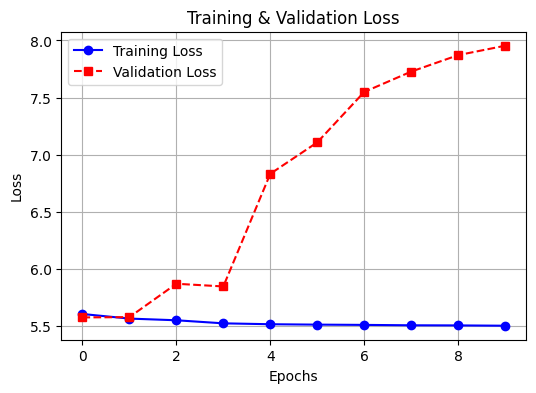

In [67]:
plot_loss(train_losses, valid_losses)

In [68]:
result_print(gen_train_loss, gen_val_loss)

Training Loss   : 5.607 | Perplexity: 272.192
Validation Loss : 5.577 | Perplexity: 264.219


In [69]:
test_loop(genmodel, criterion_gen)

| Test Loss: 5.564 | Test PPL: 260.897 |


5.564125356220064

## Multiplicatve and Additive Train

In [70]:
train_losses_mul, valid_losses_mul, mul_val_loss, mul_train_loss = train_loop(mulmodel, optimizer_mul, criterion_mul)


Epoch: 01 | Time: 4m 51s
	Train Loss: 5.603 | Train PPL: 271.292
	 Val. Loss: 5.587 |  Val. PPL: 267.003
Epoch: 02 | Time: 4m 54s
	Train Loss: 5.567 | Train PPL: 261.519
	 Val. Loss: 5.581 |  Val. PPL: 265.288
Epoch: 03 | Time: 4m 49s
	Train Loss: 5.556 | Train PPL: 258.826
	 Val. Loss: 5.615 |  Val. PPL: 274.417
Epoch: 04 | Time: 4m 48s
	Train Loss: 5.536 | Train PPL: 253.535
	 Val. Loss: 6.449 |  Val. PPL: 632.184
Epoch: 05 | Time: 4m 49s
	Train Loss: 5.519 | Train PPL: 249.339
	 Val. Loss: 6.728 |  Val. PPL: 835.666
Epoch: 06 | Time: 4m 51s
	Train Loss: 5.512 | Train PPL: 247.741
	 Val. Loss: 6.243 |  Val. PPL: 514.143
Epoch: 07 | Time: 4m 49s
	Train Loss: 5.510 | Train PPL: 247.112
	 Val. Loss: 7.438 |  Val. PPL: 1699.034
Epoch: 08 | Time: 4m 54s
	Train Loss: 5.507 | Train PPL: 246.446
	 Val. Loss: 7.714 |  Val. PPL: 2239.472
Epoch: 09 | Time: 4m 58s
	Train Loss: 5.508 | Train PPL: 246.573
	 Val. Loss: 7.453 |  Val. PPL: 1725.803
Epoch: 10 | Time: 4m 50s
	Train Loss: 5.506 | Train 

In [71]:
import torch
torch.cuda.empty_cache()


In [72]:
train_losses_add, valid_losses_add, add_val_loss, add_train_loss = train_loop(addmodel, optimizer_add, criterion_add)

Epoch: 01 | Time: 11m 19s
	Train Loss: 4.539 | Train PPL:  93.618
	 Val. Loss: 4.018 |  Val. PPL:  55.578
Epoch: 02 | Time: 24m 23s
	Train Loss: 3.915 | Train PPL:  50.150
	 Val. Loss: 3.746 |  Val. PPL:  42.362
Epoch: 03 | Time: 24m 22s
	Train Loss: 3.726 | Train PPL:  41.502
	 Val. Loss: 3.596 |  Val. PPL:  36.459
Epoch: 04 | Time: 24m 21s
	Train Loss: 3.609 | Train PPL:  36.943
	 Val. Loss: 3.503 |  Val. PPL:  33.229
Epoch: 05 | Time: 24m 34s
	Train Loss: 3.528 | Train PPL:  34.051
	 Val. Loss: 3.436 |  Val. PPL:  31.065
Epoch: 06 | Time: 24m 13s
	Train Loss: 3.467 | Train PPL:  32.043
	 Val. Loss: 3.381 |  Val. PPL:  29.410
Epoch: 07 | Time: 24m 27s
	Train Loss: 3.423 | Train PPL:  30.647
	 Val. Loss: 3.340 |  Val. PPL:  28.227
Epoch: 08 | Time: 24m 8s
	Train Loss: 3.386 | Train PPL:  29.553
	 Val. Loss: 3.307 |  Val. PPL:  27.307
Epoch: 09 | Time: 24m 20s
	Train Loss: 3.354 | Train PPL:  28.606
	 Val. Loss: 3.282 |  Val. PPL:  26.623
Epoch: 10 | Time: 24m 28s
	Train Loss: 3.329 | 

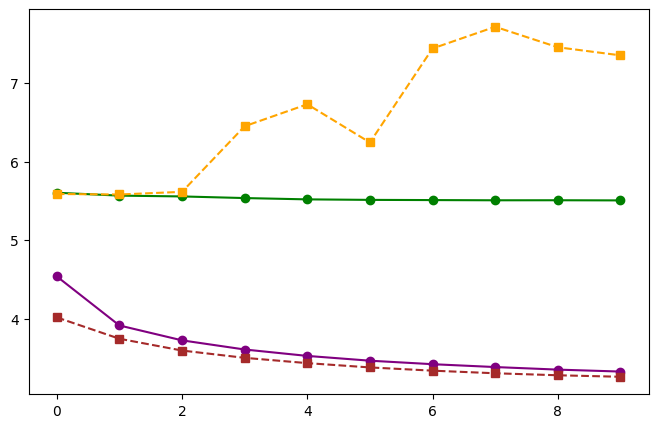

In [73]:
# Plot loss curves for two models
plt.figure(figsize=(8, 5))
plt.plot(train_losses_mul, label='Mul Train Loss', marker='o', linestyle='-', color='green')
plt.plot(valid_losses_mul, label='Mul Val Loss', marker='s', linestyle='--', color='orange')

plt.plot(train_losses_add, label='Add Train Loss', marker='o', linestyle='-', color='purple')
plt.plot(valid_losses_add, label='Add Val Loss', marker='s', linestyle='--', color='brown')


In [76]:
test_loop(mulmodel, criterion_mul)

| Test Loss: 5.567 | Test PPL: 261.587 |


5.566768392683968

In [77]:
result_print(mul_train_loss, mul_val_loss)

Training Loss   : 5.567 | Perplexity: 261.519
Validation Loss : 5.581 | Perplexity: 265.288


In [78]:
test_loop(addmodel, criterion_add)

| Test Loss: 3.268 | Test PPL:  26.247 |


3.2675520124889554

In [79]:
result_print(add_train_loss, add_val_loss)

Training Loss   : 3.329 | Perplexity:  27.907
Validation Loss : 3.262 | Perplexity:  26.114


## Inference

In [82]:
import torch

# Define save paths for each model
model_save_paths = {
    "gen": "app/models/gen_best_model.pt",
    "mul": "app/models/mul_best_model.pt",
    "add": "app/models/add_best_model.pt"
}

# Save models
torch.save(genmodel.state_dict(), model_save_paths["gen"])
torch.save(mulmodel.state_dict(), model_save_paths["mul"])
torch.save(addmodel.state_dict(), model_save_paths["add"])


In [88]:
def load_model(attention_type):

    assert attention_type in ["gen", "mul", "add"], "Invalid attention type! Choose from: 'gen', 'mul', 'add'."
    
    # Initialize model
    model = initialize_model(attention_type)

    # Define the correct save path
    save_path = f"app/models/{attention_type}_best_model.pt"

    # Load saved weights
    save_path = f"app/models/{attention_type}_best_model.pt"
    model.load_state_dict(torch.load(save_path, map_location=device))
    model.eval()

    print(f"{attention_type.upper()} Model Loaded Successfully!")
    return model


In [89]:
gen_model = load_model("gen")
mul_model = load_model("mul")
add_model = load_model("add")

GEN Model Loaded Successfully!
MUL Model Loaded Successfully!
ADD Model Loaded Successfully!


In [99]:
def translate(model, src_sentence):
    model.eval()

    # Tokenize and numericalize source sentence
    src_text = text_transform["en"](src_sentence).to(device).unsqueeze(0)  # Add batch dimension

    # Generate target sequence (start with <sos>)
    trg_text = torch.tensor([SOS_IDX], dtype=torch.long, device=device).unsqueeze(0)

    for _ in range(100):  # Maximum translation length (adjustable)
        with torch.no_grad():
            output, _ = model(src_text, trg_text)

        # Get highest probability token for the next word
        next_token = output.argmax(-1)[:, -1].item()

        # Stop if <eos> token is reached
        if next_token == EOS_IDX:
            break

        # Append next token to trg_text
        trg_text = torch.cat([trg_text, torch.tensor([[next_token]], dtype=torch.long, device=device)], dim=1)

    # Convert token IDs to words
    itos_trg = vocab_transform["my"].get_itos()
    translated_sentence = [itos_trg[token] for token in trg_text[0].tolist()]

    # Remove special tokens & format sentence
    translated_text = " ".join(translated_sentence).replace("<pad>", "").replace("<sos>", "").replace("<eos>", "").strip()
    
    return translated_text

# Example: Translate an English sentence using General Attention Model
src_sentence = "The weather is nice today."
translated_gen = translate(gen_model, src_sentence)
translated_mul = translate(mul_model, src_sentence)
translated_add = translate(add_model, src_sentence)

print("\n English Sentence:", src_sentence)
print("General Attention Translation:", translated_gen)
print("Multiplicative Attention Translation:", translated_mul)
print("Additive Attention Translation:", translated_add)



 English Sentence: The weather is nice today.
General Attention Translation: ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
Multiplicative Attention Translation: ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
Additive Attention Translation: ▁ <unk> င်း ▁ သည် ▁ <unk> င်း တို့ ▁ သည် ▁ <unk> င်း တို့ ▁၏ ▁ <unk> ▁ တို့ ▁၏ ▁ <unk> ▁ <unk> ▁ တို့ ▁၏ ▁ <unk> ▁ ဇီ လန် ▁ တို့ ▁၏ ▁ <unk> ▁ ဇီ လန် ▁ တို့ ▁၏ ▁ <unk> ▁ <unk> ▁ တို့ ▁ကို ▁ <unk> င်း ▁ တို့ ▁ တို့ ▁ သည် ▁ <unk> င်း ▁ တို့ ▁ တို့ ▁ သည် ▁ တို့ ▁ တို့ ▁ တို့ ▁ သည် ▁ <unk> င်း ▁ တို့ ▁ တို့ ▁ သည် ▁ တို့ ▁ တို့ ▁ သည် ▁ တို့ ▁ တို့ ▁ သည် ▁ <unk>


In [91]:
sample[0]

'Prime Minister Stephen Harper urged Canadians to pay tribute to the soldiers and aid workers in Afghanistan.'

In [92]:
sample[1]

'ဝန်ကြီးချုပ် စတီဖန် ဟာပါ သည် အာဖကန်နစ္စတန် ရှိ စစ်သား များ နှင့် ပရဟိတ ဆောင်ရွက်ပေးနေသူ များ ကို ချီးကျူး ဂုဏ်ပြုခြင်း ပြုလုပ် ပေး ရန် ကနေဒါ လူမျိုး များ ကို တိုက်တွန်း ခဲ့ ပါ သည် ။'

In [93]:
# Debug source tokens
src_tokens = token_transform["en"](src_sentence)
src_ids = [vocab_transform["en"][token] for token in src_tokens]
src_vocab_debug = [(token, vocab_transform["en"].get_stoi()[token], vocab_transform["en"].get_itos()[vocab_transform["en"].get_stoi()[token]]) for token in src_tokens]

print(" Source Tokens:", src_tokens)
print(" Source Token IDs:", src_ids)
print(" Vocabulary Debug:", src_vocab_debug)

 Source Tokens: ['▁The', '▁weather', '▁is', '▁nice', '▁today', '.']
 Source Token IDs: [17, 1548, 22, 11253, 159, 6]
 Vocabulary Debug: [('▁The', 17, '▁The'), ('▁weather', 1548, '▁weather'), ('▁is', 22, '▁is'), ('▁nice', 11253, '▁nice'), ('▁today', 159, '▁today'), ('.', 6, '.')]


In [101]:
src_sentence = "The weather is nice today."  # Example source sentence

# Tokenize and convert to IDs
src_text = text_transform[SRC_LANGUAGE](src_sentence).to(device)
src_text = src_text.reshape(1, -1)  # Reshape for batch size of 1

# Run model inference
model.eval()
with torch.no_grad():
    output, attentions = model(src_text, src_text)

# Process the output
output = output.squeeze(0)  # Remove batch dimension
output_max = output.argmax(1)  # Get token indices for each position

# Map token IDs to tokens
mapping = vocab_transform["my"].get_itos()
trg_tokens = [mapping[token.item()] for token in output_max]

# Print predicted tokens
print("Predicted Tokens:", trg_tokens)

Predicted Tokens: ['▁', 'တ်', '<unk>', '▁', 'သည်', '▁', '▁', '<unk>']


In [102]:
predicted_sentence = ''.join(trg_tokens).replace('▁', ' ').replace('<unk>', '[UNK]').strip()
print("Predicted Sentence:", predicted_sentence)

Predicted Sentence: တ်[UNK] သည်  [UNK]


In [117]:
# Example: Translate an English sentence
sample_src_sentence = "The weather is nice today."
sample_trg_sentence = "မိုးလေဝသ အခု ကောင်းပါတယ်။"  # Expected Myanmar translation (optional)

# Transform source and target sentences
src_text = text_transform["en"](sample_src_sentence).to(device).reshape(1, -1)  # Batch size = 1
trg_text = text_transform["my"](sample_trg_sentence).to(device).reshape(1, -1)  # Batch size = 1

# Print shapes for debugging
print("Source Text Shape:", src_text.shape)  # [1, src_len]
print("Target Text Shape:", trg_text.shape)  # [1, trg_len]

Source Text Shape: torch.Size([1, 8])
Target Text Shape: torch.Size([1, 10])


## Generator Function

In [104]:
mapping = {}
mapping[SRC_LANGUAGE] = vocab_transform[SRC_LANGUAGE].get_itos()
mapping[TRG_LANGUAGE] = vocab_transform[TRG_LANGUAGE].get_itos()

In [ ]:
# Fix for inconsistent tensor dimensions in attentions
def greedy_decode(model, src_sentence, max_len, device):
    # Tokenize and numericalize the source sentence
    src_tokens = text_transform["en"](src_sentence).to(device)
    src_tokens = src_tokens.unsqueeze(0)  # Add batch dimension

    # Generate source mask
    src_mask = model.make_src_mask(src_tokens)

    # Encode the source sentence
    enc_src = model.encoder(src_tokens, src_mask)

    # Start decoding
    trg_tokens = [SOS_IDX]  # Begin with <sos> token

    attentions = []  # Collect attentions

    for _ in range(max_len):
        trg_tensor = torch.tensor(trg_tokens, dtype=torch.long).unsqueeze(0).to(device)
        trg_mask = model.make_trg_mask(trg_tensor)

        # Pass through the decoder
        output, attention = model.decoder(trg_tensor, enc_src, trg_mask, src_mask)

        # Collect attention weights (ensure consistent dimensions)
        attentions.append(attention[:, :, :len(trg_tokens), :])  # Truncate to match trg_len

        # Get the most probable next token
        pred_token = output.argmax(2)[:, -1].item()
        trg_tokens.append(pred_token)

        # Stop if <eos> is reached
        if pred_token == EOS_IDX:
            break

    # Convert token IDs back to strings
    trg_sentence = [vocab_transform["my"].get_itos()[token] for token in trg_tokens[1:]]  # Exclude <sos>

    # Concatenate attention weights across all time steps
    attentions = torch.cat(attentions, dim=2)  # Concatenate on the trg_len dimension

    return trg_sentence, attentions


In [110]:
# Define display_attention function for visualization
def display_attention(sentence, translation, attention):
    import matplotlib.ticker as ticker
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

    attention = attention.squeeze(0).cpu().detach().numpy()

    cax = ax.matshow(attention, cmap='bone')

    ax.tick_params(labelsize=12)

    # Add tokens as tick labels
    ax.set_xticklabels([''] + sentence, rotation=45)
    ax.set_yticklabels([''] + translation)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()


In [114]:
# Define a source sentence for translation
sample_src_sentence = "I go to the market."

# Translate and visualize for all models
for model_name, model in [("General", gen_model), ("Multiplicative", mul_model), ("Additive", add_model)]:
    print(f"\n {model_name} Attention Model")

    # Perform greedy decoding
    trg_tokens, attention = greedy_decode(model, sample_src_sentence, max_len=50, device=device)

    # Add special tokens for visualization
    src_tokens = ["<sos>"] + token_transform["en"](sample_src_sentence) + ["<eos>"]
    trg_tokens = ["<sos>"] + trg_tokens + ["<eos>"]

    # Print translation
    print(f"🔹 Predicted Translation ({model_name}):", " ".join(trg_tokens))


 General Attention Model
🔹 Predicted Translation (General): <sos> ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ <eos>

 Multiplicative Attention Model
🔹 Predicted Translation (Multiplicative): <sos> ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ <eos>

 Additive Attention Model
🔹 Predicted Translation (Additive): <sos> ▁ <unk> င်း ▁ သည် ▁ <unk> င်း တို့ ▁ သည် ▁ <unk> င်း တို့ ▁၏ ▁ <unk> ▁ တို့ ▁၏ ▁ <unk> ▁ <unk> ▁ တို့ ▁၏ ▁ <unk> ▁ ဇီ လန် ▁ တို့ ▁၏ ▁ <unk> ▁ ဇီ လန် ▁ တို့ ▁၏ ▁ <unk> ▁ <unk> ▁ တို့ <eos>


In [95]:
# Define function to evaluate and generate translation
def evaluate_translation(model, src_text, trg_text, vocab_transform, attention_type):
    model.eval()
    with torch.no_grad():
        # Forward pass through the model
        output, attentions = model(src_text, trg_text)  # Turn off teacher forcing
    
    # Remove <sos> token from the beginning of the output
    output = output.squeeze(0)[1:]  # [trg_len, trg_output_dim]
    output_max = output.argmax(1)  # Get predicted token indices

    # Convert token indices back to words
    trg_tokens = [vocab_transform["my"].get_itos()[idx.item()] for idx in output_max]

    # Attention visualization
    attention = attentions[0, 0, :, :]  # First attention head
    return trg_tokens, attention


🔸 General Attention Model
🔹 Predicted Translation (General): <sos> ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁


C:\Users\st124\AppData\Local\Temp\ipykernel_21280\1505553690.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=45)
C:\Users\st124\AppData\Local\Temp\ipykernel_21280\1505553690.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + translation)


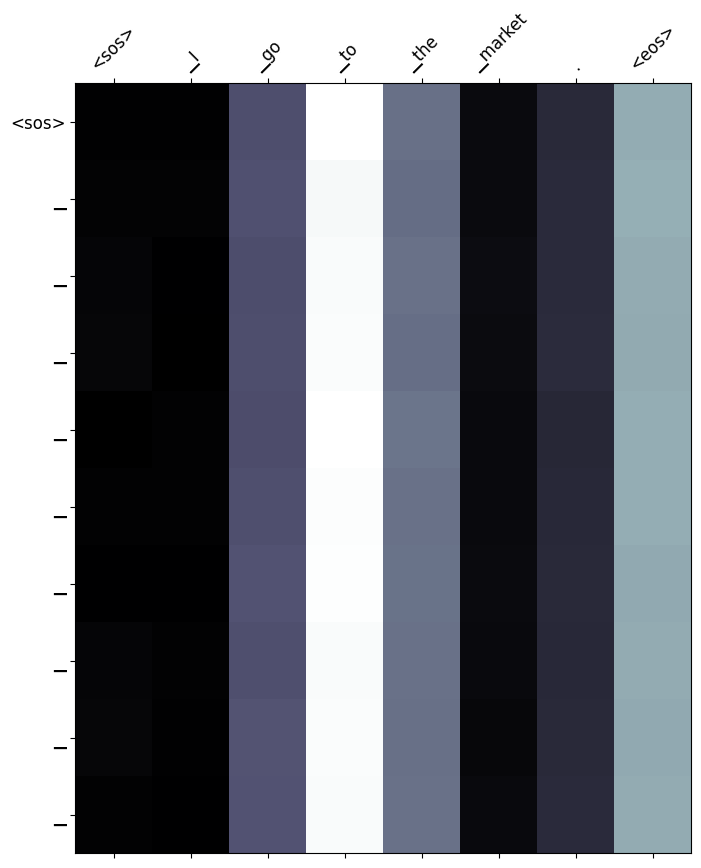


🔸 Multiplicative Attention Model
🔹 Predicted Translation (Multiplicative): <sos> ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁


C:\Users\st124\AppData\Local\Temp\ipykernel_21280\1505553690.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=45)
C:\Users\st124\AppData\Local\Temp\ipykernel_21280\1505553690.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + translation)


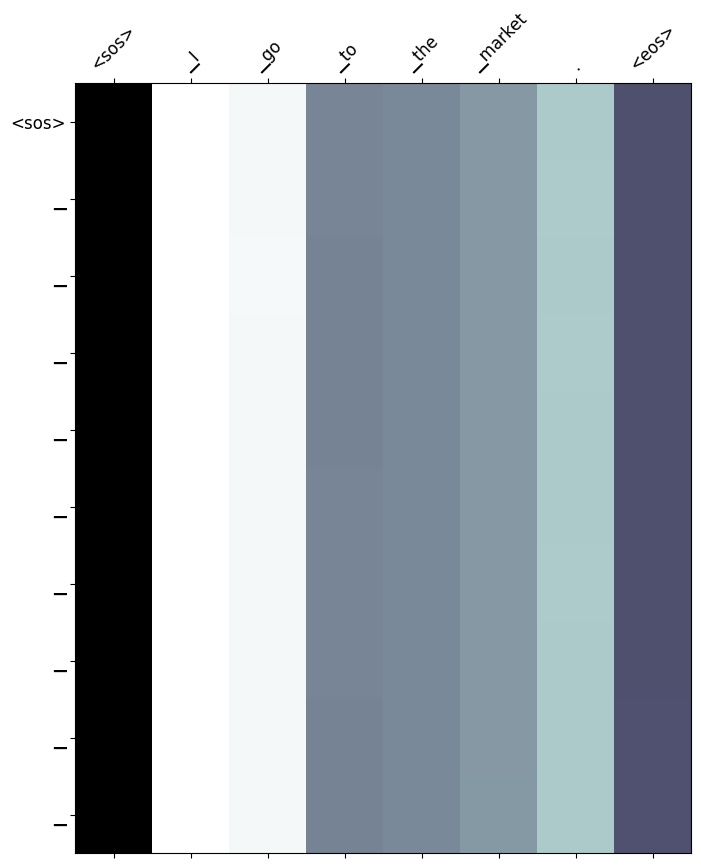


🔸 Additive Attention Model
🔹 Predicted Translation (Additive): <sos> ရွာ ေ၀ ▁ င်္ ▁ <unk> မ ▁ ပူ


C:\Users\st124\AppData\Local\Temp\ipykernel_21280\1505553690.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + sentence, rotation=45)
C:\Users\st124\AppData\Local\Temp\ipykernel_21280\1505553690.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + translation)
c:\Users\st124\OneDrive\Desktop\NLP_A3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4123 (\N{MYANMAR LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\st124\OneDrive\Desktop\NLP_A3\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 4157 (\N{MYANMAR CONSONANT SIGN MEDIAL WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\st124\OneDrive\Desktop\NLP_A3\.venv\Lib\site-packages\

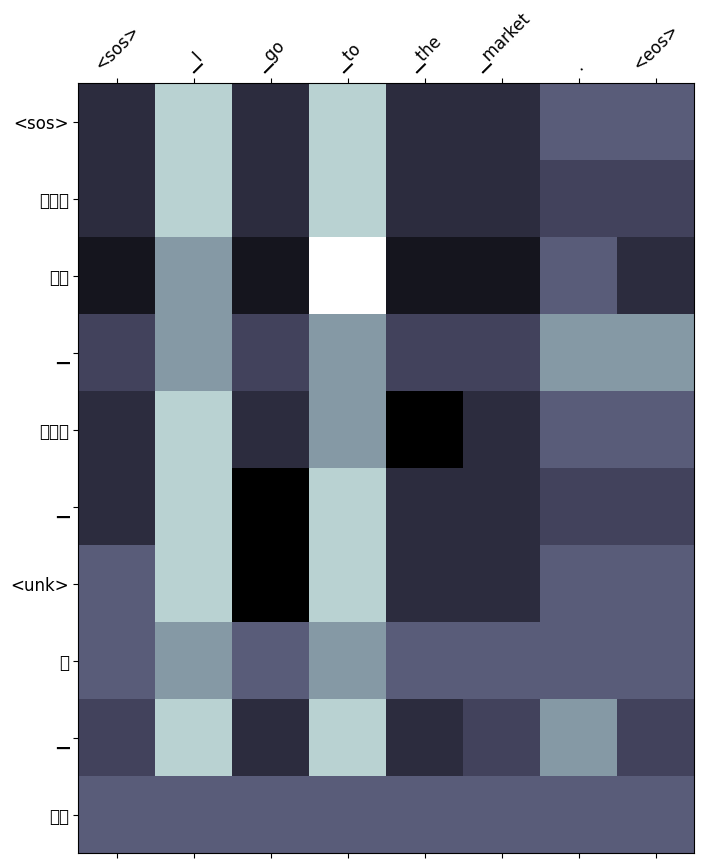

In [115]:
# Translate and visualize for all models
for model_name, model in [("General", gen_model), ("Multiplicative", mul_model), ("Additive", add_model)]:
    print(f"\n🔸 {model_name} Attention Model")
    trg_tokens, attention = evaluate_translation(model, src_text, trg_text, vocab_transform, model_name)
    
    # Add special tokens for visualization
    src_tokens = ["<sos>"] + token_transform["en"](sample_src_sentence) + ["<eos>"]
    trg_tokens = ["<sos>"] + trg_tokens
    
    # Print translation
    print(f"🔹 Predicted Translation ({model_name}):", " ".join(trg_tokens))
    
    # Visualize attention
    display_attention(src_tokens, trg_tokens, attention)